# Expedia Hotel Recommendations

Expedia is interested in predicting which hotel group a user is going to book. Expedia uses algorithms to form **hotel clusters**, where similar hotels are grouped together. These clusters are based on historical price, customer star ratings, geographical locations relative to city center, etc. These hotel clusters serve as good identifiers to which types of hotels people are going to book, while avoiding outliers such as new hotels that don't have historical data.

In this competition, the goal is to predict the booking outcome (hotel cluster) for a user event, based on their search and other attributes associated with that user event.

The general description and data are available on [Kaggle](https://www.kaggle.com/c/expedia-hotel-recommendations).

I created this notebook for learning purposes and all credit's go to Vik Paruchuri and his [tutorial](https://www.dataquest.io/blog/kaggle-tutorial/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Exploring the Data

In [2]:
#train.csv has about 37 million rows so we'll split them into two
#train2 = pd.read_csv('train.csv', skiprows=18500001, nrows=18500000)
train = pd.read_csv('train.csv', nrows=18500000)

In [3]:
test = pd.read_csv('test.csv')
dest = pd.read_csv('destinations.csv')

In [4]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18500000 entries, 0 to 18499999
Data columns (total 24 columns):
date_time                    object
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      object
srch_co                      object
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
is_booking                   int64
cnt                          int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
hotel_cluster                int64
dtypes: float64(1), int64(20), object(3)

In [6]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528243 entries, 0 to 2528242
Data columns (total 22 columns):
id                           int64
date_time                    object
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      object
srch_co                      object
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
dtypes: float64(1), int64(18), object(3)
memory usage: 424.4+ MB


* The [data page](https://www.kaggle.com/c/expedia-hotel-recommendations/data) confirms that the test set contains dates from 2015 and the training set contains dates from 2013 and 2014
* It also confirms that the test data only includes booking events, which we will use later to measure the accuracy of our prediction
* Most of columns are numeric, so we can't do a lot of feature engineering
 * For Example, user_location_location doesn't tell us what country represents which number
 * So we can't transform the data into features that better represent the predictor variables

# Hotel Clusters

The objective is to predict which hotel_cluster a user will book given the information in their search. The comptition is scored using Mean Average Precision at 5. This means that we make 5 prediction for each row, and you get a higher score the earlier the correct prediction appears on our list of 5 predictions. There are 100 clusters in total.

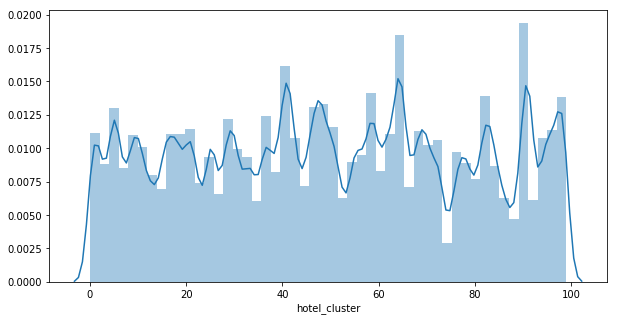

In [8]:
sns.distplot(train['hotel_cluster'])

The hotel clusters seem to be fairly evenly distributed.

# Downsizing the Dataset

My laptop doesn't have enough RAM to read the entire training set in and even if I did, we wouldn't want to use a dataset that has 37 million rows because it makes it hard to experiment with.
<br>
<br>
Steps:
1. I will take a random sample of 10,000 unique users from half of the training set that I have currently read in. 
2. Then I will iterate chunks of the entire training set and append rows of the 10,000 users I sampled, so we preserve the full data of each user. 
3. Select new training and testing datasets from the the new dataframe. By selecting both sets from the train.csv, we'll have the true hotel_cluster label for every row, and we'll be able to calculate our accuracy as we test techniques

In [9]:
import random
unique_users = set(train.user_id.unique())
rand_user_id = random.sample(unique_users,10000)

In [10]:
sample_train = pd.DataFrame()
train_chunk = pd.read_csv('train.csv', iterator = True, chunksize = 1000000)
for chunk in train_chunk:
    sample_train = sample_train.append(chunk.loc[chunk['user_id'].isin(rand_user_id)])

In [11]:
#check we have our 10,000 users
sample_train['user_id'].nunique()

10000

## Adding Dates

Before we downsize, let convert and parse the date_time field into month and year fields. Since the train and test data are seperated by date, we'll need to add date fields so we can segment our data into two sets the same way.

In [12]:
sample_train['date_time'] = pd.to_datetime(sample_train['date_time'])
sample_train['year'] = sample_train['date_time'].dt.year
sample_train['month'] = sample_train['date_time'].dt.month

In [13]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317922 entries, 2248 to 18498644
Data columns (total 26 columns):
date_time                    317922 non-null datetime64[ns]
site_name                    317922 non-null int64
posa_continent               317922 non-null int64
user_location_country        317922 non-null int64
user_location_region         317922 non-null int64
user_location_city           317922 non-null int64
orig_destination_distance    202839 non-null float64
user_id                      317922 non-null int64
is_mobile                    317922 non-null int64
is_package                   317922 non-null int64
channel                      317922 non-null int64
srch_ci                      317563 non-null object
srch_co                      317563 non-null object
srch_adults_cnt              317922 non-null int64
srch_children_cnt            317922 non-null int64
srch_rm_cnt                  317922 non-null int64
srch_destination_id          317922 non-null int64
srch

In [14]:
sample_train.groupby(['year'])['month'].value_counts()

year  month
2013  6         9058
      8         8718
      3         8713
      7         8531
      10        7987
      9         7901
      4         7851
      5         7648
      12        6997
      11        6961
      2         6589
      1         6038
2014  12       25604
      10       24606
      7        23728
      9        23152
      11       22486
      8        22311
      6        17988
      5        15890
      3        14746
      4        14667
      2        10175
      1         9577
Name: month, dtype: int64

## Picking new training and testing sets

We will split our sample data set so that anything after July 2014 is in test_sub (our new test subset) and anything before is in train_sub.

In [15]:
train_sub = sample_train[((sample_train.year == 2013) | ((sample_train.year == 2014) & (sample_train.month < 8)))]
test_sub = sample_train[((sample_train.year == 2014) & (sample_train.month >= 8))]

Our test set only contains booking events. When is_booking is 0, it means that instance was a click and didn't end in a booking. So we'll need our sample t2 to only include bookings as well

In [16]:
test_sub = test_sub[test_sub.is_booking == 1]

# First Algorithm

We'll start by taking the 5 most common clusters in the first half of our train data set.

In [17]:
most_common_clusters = list(train.hotel_cluster.value_counts().head().index)
print(most_common_clusters)

[91, 41, 48, 64, 65]


We can use the most common clusters as our first list of predictions for each row in the test subset.

In [18]:
predictions = [most_common_clusters for i in range(test_sub.shape[0])]

## Evaluating Error

In order to evaluate error, we'll need to figure out how to compute Mean Average Precision, which is also how the comptition is scored. Mean Average Precision can be defined as the average precision values with respect to the number of predictions needed. We can download the ml_metrics package created by [Ben Hamner](https://github.com/benhamner), which includes the Mean Average Precision calculation. The package can be installed [here](https://github.com/benhamner/Metrics/tree/master/Python).

In [19]:
import ml_metrics as metrics
target = [[l] for l in test_sub['hotel_cluster']]
metrics.mapk(target, predictions, k=5)

0.066660876949204875

Our target needs to be in list of lists format to call the mapk method. Unsurprisingly, the MAP is not good, but we've generated our first set of predictions and evaluated our error!

## Correlation between Features

Let's check if any columns are linearly correlated with hotel_clusters, which could tell us more about how to better predict the clusters.

In [20]:
train.corr()['hotel_cluster']

site_name                   -0.021965
posa_continent               0.014717
user_location_country       -0.010650
user_location_region         0.007464
user_location_city           0.001190
orig_destination_distance    0.007302
user_id                      0.000928
is_mobile                    0.008706
is_package                   0.039519
channel                      0.000547
srch_adults_cnt              0.012399
srch_children_cnt            0.016330
srch_rm_cnt                 -0.005820
srch_destination_id         -0.011258
srch_destination_type_id    -0.032694
is_booking                  -0.021970
cnt                          0.003112
hotel_continent             -0.013892
hotel_country               -0.023953
hotel_market                 0.034220
hotel_cluster                1.000000
Name: hotel_cluster, dtype: float64

Since none of the columns are correlated with hotel_cluster, linear regression won't work well on our data.

# Predictions using Machine Learning

We can generate features using the destinations data set, but we don't have any information on the columns after srch_destination_id.

In [21]:
dest.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


Even though the features have been anonymized and converted to numbers, we can still use this information in our machine learning algorithm. Let's first compress the number of columns down so it's easier to handly using a technique called [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis), which will reduce the size of our data while preserving the variance between rows.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
dest_small = pca.fit_transform(dest[["d{0}".format(i + 1) for i in range(149)]])
dest_small = pd.DataFrame(dest_small)
dest_small["srch_destination_id"] = dest["srch_destination_id"]

In [23]:
dest_small.head()

,0,1,2,srch_destination_id
0,-0.044268,0.169419,0.032522,0
1,-0.440761,0.077405,-0.091572,1
2,0.001033,0.020677,0.012108,2
3,-0.480467,-0.040345,-0.019320,3
4,-0.207253,-0.042694,-0.011744,4


## Generating Features

We will do the following:
* Generate new date features based on date_time, srch_ci (check-in date), and srch_co (check-out date)
* Remove the date_time column since it's not needed
* add features from dest_small
* Replace any missing values with -1

In [24]:
def calc_fast_features(df):
    df["date_time"] = pd.to_datetime(df["date_time"])
    df["srch_ci"] = pd.to_datetime(df["srch_ci"], format='%Y-%m-%d', errors="coerce")
    df["srch_co"] = pd.to_datetime(df["srch_co"], format='%Y-%m-%d', errors="coerce")
    
    props = {}
    for prop in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
        props[prop] = getattr(df["date_time"].dt, prop)
    
    carryover = [p for p in df.columns if p not in ["date_time", "srch_ci", "srch_co"]]
    for prop in carryover:
        props[prop] = df[prop]
    
    date_props = ["month", "day", "dayofweek", "quarter"]
    for prop in date_props:
        props["ci_{0}".format(prop)] = getattr(df["srch_ci"].dt, prop)
        props["co_{0}".format(prop)] = getattr(df["srch_co"].dt, prop)
    props["stay_span"] = (df["srch_co"] - df["srch_ci"]).astype('timedelta64[h]')
        
    ret = pd.DataFrame(props)
    
    ret = ret.join(dest_small, on="srch_destination_id", how='left', rsuffix="dest")
    ret = ret.drop("srch_destination_iddest", axis=1)
    return ret

df = calc_fast_features(train_sub)
df.fillna(-1, inplace=True)

In [25]:
df.head()

,channel,ci_day,ci_dayofweek,ci_month,ci_quarter,cnt,co_day,co_dayofweek,co_month,co_quarter,...,srch_rm_cnt,stay_span,user_id,user_location_city,user_location_country,user_location_region,year,0,1,2
2248,2,1.0,4.0,8.0,3.0,1,6.0,2.0,8.0,3.0,...,1,120.0,9701,53434,69,756,2014,0.448790,-0.263463,0.051079
2249,2,1.0,4.0,8.0,3.0,1,4.0,0.0,8.0,3.0,...,1,72.0,9701,53434,69,756,2014,0.448790,-0.263463,0.051079
2250,2,1.0,4.0,8.0,3.0,1,4.0,0.0,8.0,3.0,...,1,72.0,9701,53434,69,756,2014,0.448790,-0.263463,0.051079
2930,1,19.0,5.0,4.0,2.0,2,21.0,0.0,4.0,2.0,...,1,48.0,15286,50466,66,346,2014,-0.452399,0.022328,0.056345
2931,1,20.0,6.0,4.0,2.0,1,22.0,1.0,4.0,2.0,...,1,48.0,15286,50466,66,346,2014,-0.452399,0.022328,0.056345


The function calc_fast_features parses and creates new features such as length of stay, check in day, and check out month.

## Random Forrest Classifier

We'll use k-fold cross validation to estimate the accuracy of our prediction and use a Random Forest algorthim to predict the hotel clusters.

In [26]:
predictors = [c for c in df.columns if c not in ["hotel_cluster"]]
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, min_weight_fraction_leaf=0.1)
scores = cross_validation.cross_val_score(clf, df[predictors], df['hotel_cluster'], cv=3)
scores

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([ 0.06284616,  0.06621413,  0.06384385])

The above accuracy isn't very good, so let's try 2 fold cross validation and train 10 decision trees per label.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from itertools import chain

all_probs = []
unique_clusters = df["hotel_cluster"].unique()
for cluster in unique_clusters:
    df["target"] = 1
    df["target"][df["hotel_cluster"] != cluster] = 0
    predictors = [col for col in df if col not in ['hotel_cluster', "target"]]
    probs = []
    cv = KFold(len(df["target"]), n_folds=2)
    clf = RandomForestClassifier(n_estimators=10, min_weight_fraction_leaf=0.1)
    for i, (tr, te) in enumerate(cv):
        clf.fit(df[predictors].iloc[tr], df["target"].iloc[tr])
        preds = clf.predict_proba(df[predictors].iloc[te])
        probs.append([p[1] for p in preds])
    full_probs = chain.from_iterable(probs)
    all_probs.append(list(full_probs))

In [28]:
prediction_frame = pd.DataFrame(all_probs).T
prediction_frame.columns = unique_clusters

In [29]:
def find_top_5(row):
    return list(row.nlargest(5).index)

preds = []
for index, row in prediction_frame.iterrows():
    preds.append(find_top_5(row))

In [30]:
targ = [[l] for l in test_sub["hotel_cluster"]]
metrics.mapk(targ, preds, k=5)

0.046118959394781535

Our accuracy is even worse, so let's try a different technique that doesn't require machine learning

# Top Clusters based on Destination

If we aggregate on orig_desination_distance, we can try to match the same user together to get a better prediction. We can also aggregate on srch_destination_id to find the most popular hotel clusters for each destination. We can first generate scores for each cluster in each srch_destination_id. 
<br>
<br>
Steps:
* Group train_sub by srch_destination_id and hotel_cluster
* Iterate through each group and:
 * Assign 1 point to each hotel cluster where is_booking is True
 * Assign .15 points to each hotel cluster where is_booking is False
 * Assign the score to the srch_destination_id / hotel_cluster combination in a dictionary

In [32]:
def make_key(items):
    return "_".join([str(i) for i in items])

match_cols = ["srch_destination_id"]
cluster_cols = match_cols + ['hotel_cluster']
groups = train_sub.groupby(cluster_cols)
top_clusters = {}
for name, group in groups:
    clicks = len(group.is_booking[group.is_booking == False])
    bookings = len(group.is_booking[group.is_booking == True])
    
    score = bookings + .15 * clicks
    
    clus_name = make_key(name[:len(match_cols)])
    if clus_name not in top_clusters:
        top_clusters[clus_name] = {}
    top_clusters[clus_name][name[-1]] = score

We want to create a dictionary where each key is a srch_destination_id and each value in will be another dictionary that contains the hotel clusters as keys and scores as the values. We'll then want to transform this dictionary to find the top 5 hotel clusters for each srch_destination_id.

In [34]:
import operator

cluster_dict = {}
for n in top_clusters:
    tc = top_clusters[n]
    top = [l[0] for l in sorted(tc.items(), key=operator.itemgetter(1), reverse=True)[:5]]
    cluster_dict[n] = top

## Making Predictions based on Destination

In [35]:
preds = []
for index, row in test_sub.iterrows():
    key = make_key([row[m] for m in match_cols])
    if key in cluster_dict:
        preds.append(cluster_dict[key])
    else:
        preds.append([])

In [38]:
preds[0:5]

[[82, 2, 11, 5, 43],
 [50, 39, 77, 14, 10],
 [1, 79, 45, 24, 19],
 [47, 48, 42, 32, 76],
 [71, 34, 77, 54, 0]]

## Calculating Error

In [39]:
metrics.mapk([[l] for l in test_sub["hotel_cluster"]], preds, k=5)

0.23009495136637331

Our accuracy is now 5 times better than when we used Random Forest Classifier. Our accuracy will look different if we submit our output to Kaggle because we've computed the error using a sample of the original training set, while the leaderboard score is computing using the original testing set. We also aren't using the full training set.

# Matching Users for Better Accuracy

A post a Kaggle mentioned that you can increase your accuracy score if you match user in the training set from the testing set using certain columns

In [41]:
match_cols = ['user_location_country', 'user_location_region', 'user_location_city', 'hotel_market', 'orig_destination_distance']

groups = train_sub.groupby(match_cols)
    
def generate_exact_matches(row, match_cols):
    index = tuple([row[t] for t in match_cols])
    try:
        group = groups.get_group(index)
    except Exception:
        return []
    clus = list(set(group.hotel_cluster))
    return clus

exact_matches = []
for i in range(test_sub.shape[0]):
    exact_matches.append(generate_exact_matches(test_sub.iloc[i], match_cols))

To accurately evaluate error, we'll combine these predictions with our earlier predictions. We'll combine exact_matches, preds, and most_common_clusters.

In [43]:
def f5(seq, idfun=None): 
    if idfun is None:
        def idfun(x): return x
    seen = {}
    result = []
    for item in seq:
        marker = idfun(item)
        if marker in seen: continue
        seen[marker] = 1
        result.append(item)
    return result
    
full_preds = [f5(exact_matches[p] + preds[p] + most_common_clusters)[:5] for p in range(len(preds))]
metrics.mapk([[l] for l in test_sub["hotel_cluster"]], full_preds, k=5)

0.27037594565385209

Now our Mean Average Precision is even better. I won't actually submit a file to the Kaggle competition because it's been over for a while. I went through this notebook just for learning purposes.